In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance as spd
import pickle
from sklearn.metrics import confusion_matrix
from numpy.linalg import pinv

## Pergunta 1

In [2]:
X = np.array([[-4,-4,-4,4,1,1],[2,1,-2,2,1,3]])
X0 = X[:,:3]
X1 = X[:,3:]
print(X)
print(X0)
print(X1)

[[-4 -4 -4  4  1  1]
 [ 2  1 -2  2  1  3]]
[[-4 -4 -4]
 [ 2  1 -2]]
[[4 1 1]
 [2 1 3]]


In [3]:
m0 = np.mean(X0,axis=1)
m1 = np.mean(X1,axis=1)
city = np.sum(np.abs(m0-m1))
pint = np.dot(m0.T,m1)
norm0 = np.linalg.norm(m0)
norm1 = np.linalg.norm(m1)
cosine = 1-(pint/(norm0*norm1))
print(np.round(city,2))
print(np.round(cosine,2))


7.67
1.65


## 1 a) III

In [4]:
S0 = np.cov(X0)
print(np.round(np.dot(S0,m0),2))
print(np.round(np.dot(S0,m1),2))

[0.   1.44]
[0.   8.67]


## 1 b) IV

In [5]:
fName = 'A48168_Q002_data.p'
D = pickle.load(open(fName,'rb'))

In [6]:
X = D['dados']
y = D['trueClass']
print(X.shape)
print(y.shape)

(2, 2300)
(2300,)


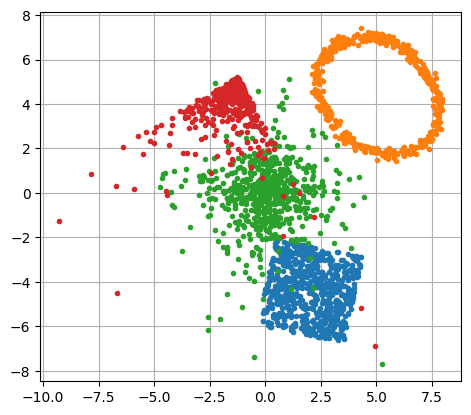

In [7]:
X0 = X[:,y==0]
X1 = X[:,y==1]
X2 = X[:,y==2]
X3 = X[:,y==3]

plt.plot(X[0,y==0],X[1,y==0],'.')
plt.plot(X[0,y==1],X[1,y==1],'.')
plt.plot(X[0,y==2],X[1,y==2],'.')
plt.plot(X[0,y==3],X[1,y==3],'.')
plt.axis('scaled')
plt.grid(True)

In [8]:
print(np.round(np.mean(X,axis=1),2))
print(np.round(np.cov(X),2))

[1.31 0.59]
[[ 7.41  0.11]
 [ 0.11 15.1 ]]


## 2 a) I

In [9]:
priori = np.round((len(X0)/len(X)),2)
print(priori)
print(np.round(np.cov(X2),2))

1.0
[[1.95 0.05]
 [0.05 2.21]]


## 2 b) IV

In [10]:
m0 = np.mean(X0,axis=1)
m1 = np.mean(X1,axis=1)
m2 = np.mean(X2,axis=1)
m3 = np.mean(X3,axis=1)

cov0 = np.cov(X0)
cov1 = np.cov(X1)
cov2 = np.cov(X2)
cov3 = np.cov(X3)

print(np.round(np.dot(m1.T,np.dot(cov3,m3)),2))

print(np.round(np.dot(cov1,m3),2))

print(np.round(np.dot(m2,m3),2))

print(np.round(np.linalg.det(np.dot(cov0,cov2)),2))

19.0
[-8.15 15.72]
-0.22
7.63


## 2 c) III

In [11]:
city03 = np.sum(np.abs(m0-m3))

print(np.round(city03,2))

pint = np.dot(m0.T,m2)
norm0 = np.linalg.norm(m0)
norm1 = np.linalg.norm(m2)
cosine = 1-(pint/(norm0*norm1))

print(np.round(cosine,2))

11.95
0.06


## 2 d) I

In [12]:
q = pickle.load(open('A48168_Ficha1_Respostas.p','rb'))
print(q)

{'Q001': array([[0., 0., 1., 0.],
       [0., 0., 0., 1.]]), 'Q002': array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]]), 'nome': 'Diogo Sancho Pires Lobo', 'numero': 'A48168'}


In [13]:

q['Q001'][0,:] = [0,0,1,0]
q['Q001'][1,:] = [0,0,0,1]

q['Q002'][0,:] = [1,0,0,0]
q['Q002'][1,:] = [0,0,0,1]
q['Q002'][2,:] = [0,0,1,0]
q['Q002'][3,:] = [1,0,0,0]

pickle.dump(q,open('A48168_Ficha1_Respostas.p','wb'))

In [14]:
vs = pickle.load(open('A48168_Ficha1_Respostas.p','rb'))
print(vs)

{'Q001': array([[0., 0., 1., 0.],
       [0., 0., 0., 1.]]), 'Q002': array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]]), 'nome': 'Diogo Sancho Pires Lobo', 'numero': 'A48168'}
